Loyihamiz maqsadi `Abalone` yoshini bashorat qilish, ya'ni barcha ustunlarga nisbatan `Rings` ustunini bashorat qilamiz.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics 

In [2]:
url = "https://raw.githubusercontent.com/farkhod-developer/Datasets_Practice/main/abalone.data.csv"
df = pd.read_csv(url)
df.head()

,gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Dataset ustunlarini nomlarini qanday ma'no aks ettirishini ko'rishimiz mumkin.

        Atribut nomi        Ta'rif     

- `gender`	--->  *Jins (M: Erkak, F: Ayol, I: Go'dak)*

- `Length`	--->  *Eng uzun qobiq o'lchami (millimetr - mm)*

- `Diameter`	--->  *Diametri - uzunlikka perpendikulyar (mm)*

- `Height`	--->  *Balandligi - qobiqdagi go'sht bilan (mm)*

- `Whole weight`	--->  *Butun abalonening vazni (gramm)*

- `Shucked weight`	--->  *Go'shtning vazni (gramm)*

- `Viscera weight`	--->  *Qon ketishdan keyin ichak vazni (gramm)*

- `Shell weight`	--->  *Qobiq og'irligi - quritilganidan keyin (gramm)*

- `Rings`  --->  *Halqalar soni - qiymat + 1,5 yoshni yillar bo'yicha beradi (masalan, 4 = 5,5 yil)*

In [3]:
df.shape

(4177, 9)

datasetimiz `4177` ta qator va `9` ta ustundan iborat ekan

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df['gender'].replace("M",0, inplace=True)
df['gender'].replace("F",1, inplace=True)
df['gender'].replace("I",2, inplace=True)
df['gender'].value_counts()

0    1528
2    1342
1    1307
Name: gender, dtype: int64

gender(jins) ustunidagi matnli ma'lumotlarimizni raqamlarga o'zgartirib oldik, bu yerda 
- M(erkak) -> 0
- F(ayol) -> 1
- I(go'dak) ->2

In [6]:
df['gender'].value_counts()/len(df)

0    0.365813
2    0.321283
1    0.312904
Name: gender, dtype: float64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


biz **`Rings`** ustunini bashorat qilishimiz kerak

**`Rings`** ustuniga nisbatan barcha ustunlarning *`korrelyatsiyasi`*

In [9]:
df.corrwith(df['Rings']).abs().sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
gender            0.351822
dtype: float64

`korrelyatsiyasi` 50 dan baland bo'lgan ustunlarni vizualizatsiyasini chiqarib oldik

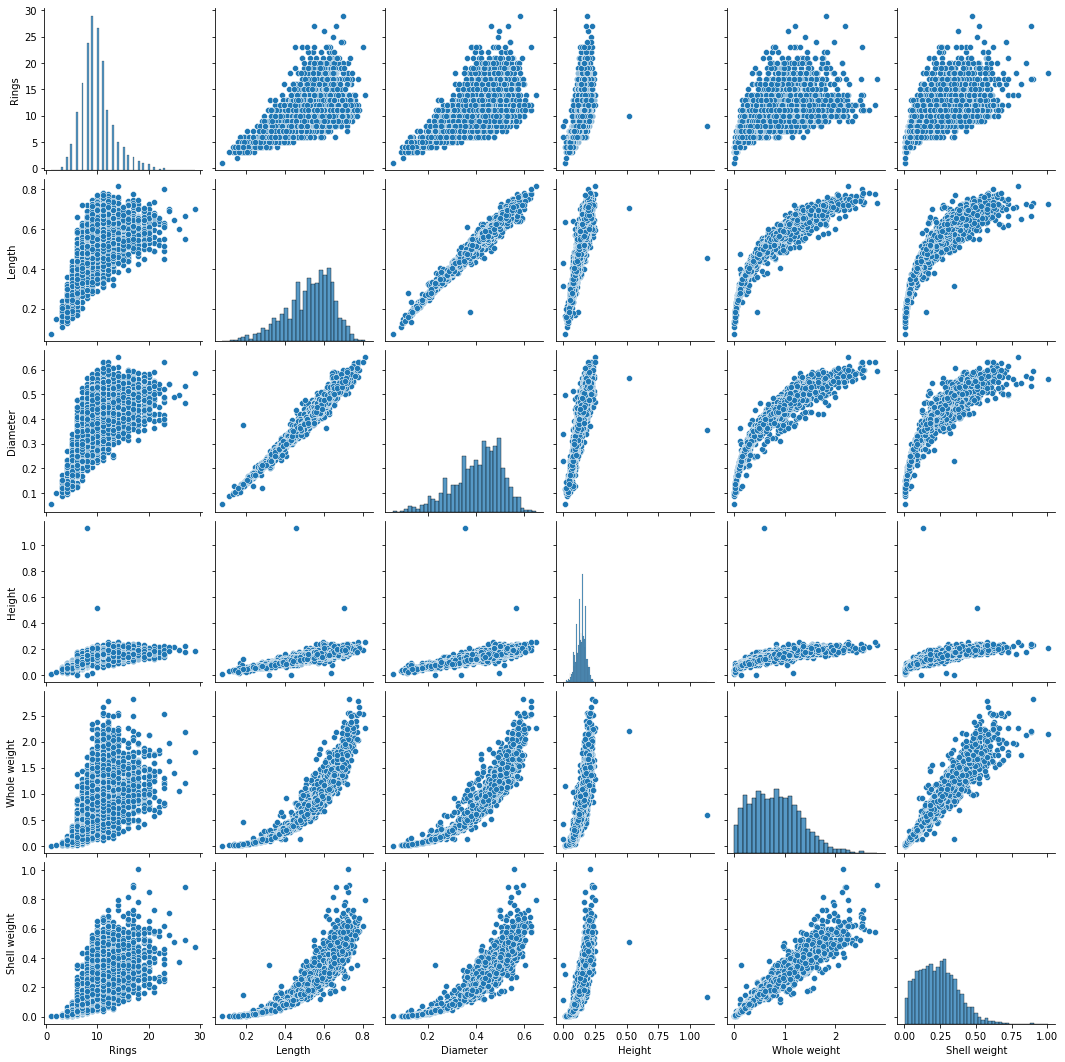

In [10]:
sns.pairplot(df[['Rings','Length','Diameter','Height','Whole weight','Shell weight']])
plt.show()


In [11]:
df.shape

(4177, 9)

Bizda ma'lumotlar kam, shuning uchun 10% test uchun olamiz

In [29]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.10, random_state=42)

Linear Regression ML

In [30]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['Length']])
y_train = np.asanyarray(train_set[['Rings']])

# Modelni tarbiyalaymiz (train)
LR_model.fit(x_train, y_train)

#theta1 va theta0 koeefisentlarni ajratib olamiz 
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print (f'theta1= {theta1:.2f}')
print (f'theta0= {theta0:.2f}')

theta1= 14.75
theta0= 2.20


$\theta_0$ va $\theta_1$ qiymatlari yordamida to'g'ri chiziq chizamiz

Text(0, 0.5, 'Rings')

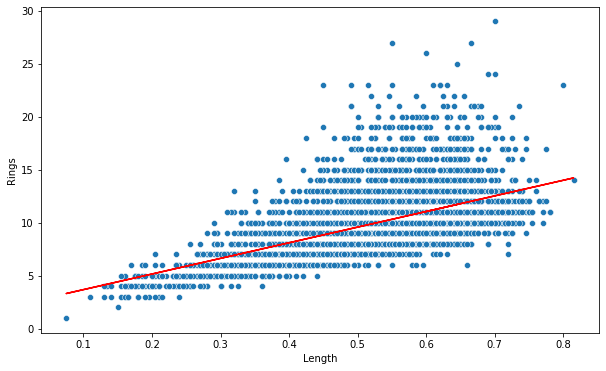

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Length', y='Rings')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel("Length")
plt.ylabel("Rings")

### Modelni baholaymiz

In [32]:
x_test = np.asanyarray(test_set[['Length']])
y_test = np.asanyarray(test_set[['Rings']])

In [33]:
y_predict = LR_model.predict(x_test)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"MAE= {MAE}")
print(f"RMSE= {RMSE}")

MAE= 1.9070247958091644
RMSE= 2.668241166510791


`Regressiya` yordamida tuzgan modelimizda eng yaxshi natija `MAE` orqali eng kam xatolikda chiqmoqda